In [14]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from pathlib import Path
import os

import os
from PIL import Image

# Function to convert all images to JPG format
def convert_to_jpg(source_dir, dest_dir):
    # Create the destination directory 
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Iterate through files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith(".JPEG") or filename.endswith(".JPG") or filename.endswith(".jpeg") or filename.endswith(".jpg"):
            # Open the image
            image_path = os.path.join(source_dir, filename)
            image = Image.open(image_path)
            
            # Convert to JPG format
            jpg_filename = os.path.splitext(filename)[0] + ".jpg"
            jpg_path = os.path.join(dest_dir, jpg_filename)
            image.convert("RGB").save(jpg_path, "JPEG")
            
            print(f"Converted {filename} to JPG")

# Source and destination directories
source_directory = r"
destination_directory = r"

# Convert images to JPG and save to the destination directory
convert_to_jpg(source_directory, destination_directory)


In [16]:
from pathlib import Path
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
image_dir = Path(r"C:\Users\net pc\Desktop\Liver_tumor_data")

if image_dir.exists():
    print("Path exists.")
else:
    print("Path does not exist.")

filepaths = list(image_dir.glob(r'*/*.jpeg')) 

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

print("Number of files found:", len(filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

print("Number of rows in image_df:", len(image_df))



Path exists.
Number of files found: 908
Number of rows in image_df: 908


In [17]:
image_df

,Filepath,Label
0,C:\Users\net pc\Desktop\Liver_tumor_data\benig...,benign_jpg
1,C:\Users\net pc\Desktop\Liver_tumor_data\benig...,benign_jpg
2,C:\Users\net pc\Desktop\Liver_tumor_data\benig...,benign_jpg
3,C:\Users\net pc\Desktop\Liver_tumor_data\benig...,benign_jpg
4,C:\Users\net pc\Desktop\Liver_tumor_data\benig...,benign_jpg
...,...,...
903,C:\Users\net pc\Desktop\Liver_tumor_data\norma...,normal_jpg
904,C:\Users\net pc\Desktop\Liver_tumor_data\norma...,normal_jpg
905,C:\Users\net pc\Desktop\Liver_tumor_data\norma...,normal_jpg
906,C:\Users\net pc\Desktop\Liver_tumor_data\norma...,normal_jpg


In [18]:
train_df, test_df = train_test_split(image_df, train_size=0.80, shuffle=True, random_state=1)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:

# Define ImageDataGenerator for train and test sets
train_generator = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     validation_split=0.2)

test_generator = ImageDataGenerator(rescale=1./255)



In [21]:

# Generate data flows
train_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                   x_col='Filepath',
                                                   y_col='Label',
                                                   target_size=(64, 64),
                                                   color_mode='rgb',
                                                   class_mode='categorical',  
                                                   batch_size=32,
                                                   shuffle=True,
                                                   seed=42,
                                                   subset='training')

val_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='categorical', 
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='validation')

test_images = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='categorical',  
                                                 batch_size=32,
                                                 shuffle=False)

Found 581 validated image filenames belonging to 3 classes.
Found 145 validated image filenames belonging to 3 classes.
Found 182 validated image filenames belonging to 3 classes.


In [22]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

def create_model(input_shape, num_classes):
    model = Sequential()

    # Mixed-Scale Dense Convolution Layer
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Self-Attention Mechanism
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Hierarchical Feature Fusion
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Attention-Based Contextual Information
    model.add(Flatten())
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    
    # Additional Fully Connected Layers
    model.add(Dense(units=128, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=16, activation="relu"))
    model.add(Dropout(0.25))

    # Output layer
    model.add(Dense(units=num_classes, activation="softmax"))

    return model

# Assuming input_shape is (64, 64, 3) and num_classes is 4 for your multi-class problem
input_shape = (64, 64, 3)
num_classes = 3
model = create_model(input_shape, num_classes)



C:\Users\Public\Efendim\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,651 (1.57 MB)

 Trainable params: 411,651 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)


Epoch 1/50


C:\Users\Public\Efendim\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.2207 - loss: 1.1046 - val_accuracy: 0.2552 - val_loss: 1.0945 - learning_rate: 1.0000e-04
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.2807 - loss: 1.0959 - val_accuracy: 0.3862 - val_loss: 1.0894 - learning_rate: 1.0000e-04
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.3050 - loss: 1.0947 - val_accuracy: 0.6276 - val_loss: 1.0815 - learning_rate: 1.0000e-04
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.4140 - loss: 1.0811 - val_accuracy: 0.6276 - val_loss: 1.0446 - learning_rate: 1.0000e-04
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.4313 - loss: 1.0393 - val_accuracy: 0.6276 - val_loss: 0.9551 - learning_rate: 1.0000e-04
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.4858 - loss: 1.0170 - val_accuracy: 0.6276 - val_loss: 0.9440 - learning_rate: 1.0000e-04
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.5763 - lo

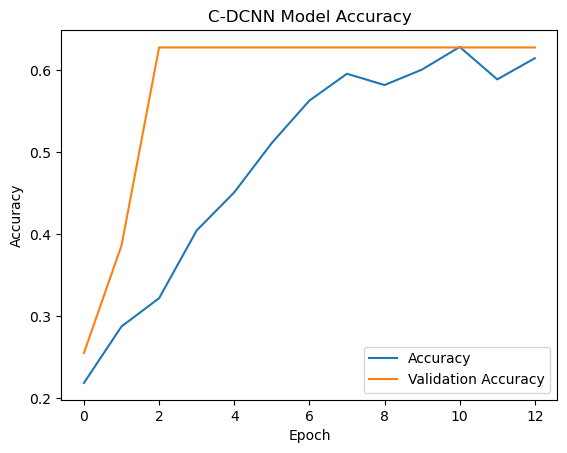

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('C-DCNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'loss', 'Validation Loss'])
plt.show()

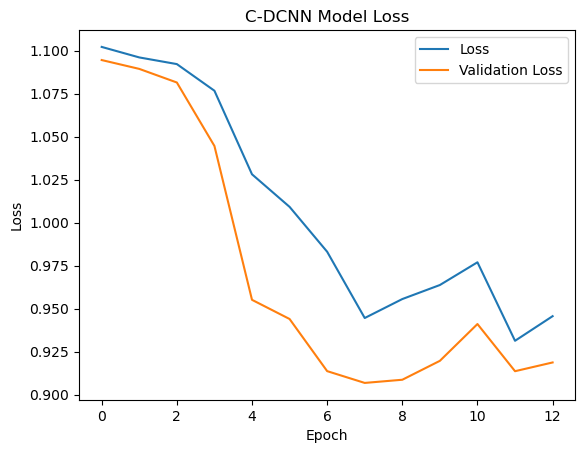

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('C-DCNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [27]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.92234
Test Accuracy: 64.84%


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


C:\Users\Public\Efendim\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\Efendim\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\Efendim\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


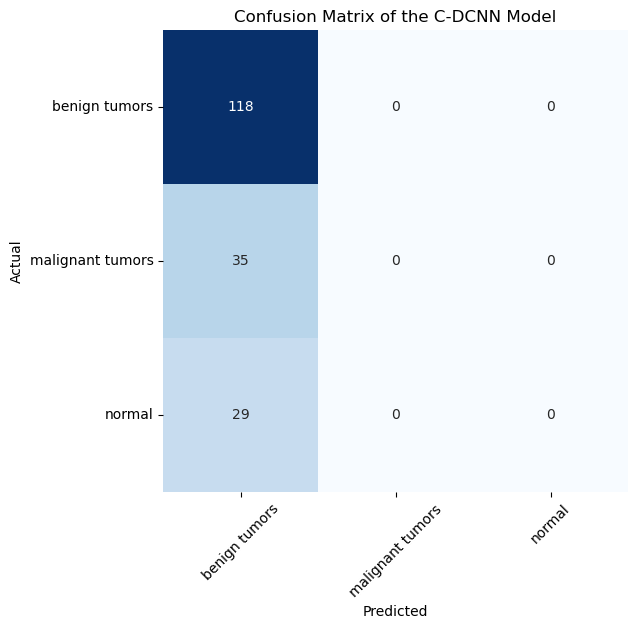

Classification Report:
----------------------
                   precision    recall  f1-score   support

   benign tumors       0.65      1.00      0.79       118
malignant tumors       0.00      0.00      0.00        35
          normal       0.00      0.00      0.00        29

        accuracy                           0.65       182
       macro avg       0.22      0.33      0.26       182
    weighted avg       0.42      0.65      0.51       182



In [31]:
# Convert labels to one-hot encoding
from keras.utils import to_categorical

test_labels_onehot = to_categorical(test_images.labels, num_classes=3)

# Predict classes
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(np.argmax(test_labels_onehot, axis=1), predicted_classes)

# Create classification report
clr = classification_report(np.argmax(test_labels_onehot, axis=1), predicted_classes, target_names=["benign tumors", "malignant tumors", "normal"])

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(3) + 0.5, labels=["benign tumors", "malignant tumors", "normal"], rotation=45)
plt.yticks(ticks=np.arange(3) + 0.5, labels=["benign tumors", "malignant tumors", "normal"], rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of the C-DCNN Model")
plt.show()

# Print classification report
print("Classification Report:\n----------------------\n", clr)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


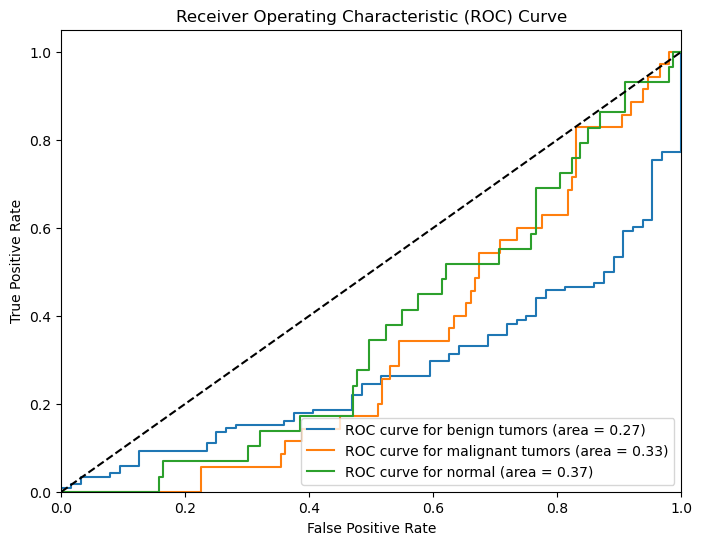

AUC ROC for benign tumors: 0.27397
AUC ROC for malignant tumors: 0.33158
AUC ROC for normal: 0.36737


In [32]:
# Obtain predicted probabilities
predicted_probabilities = model.predict(test_images)

# Import necessary libraries
from sklearn.metrics import roc_auc_score, roc_curve

# Convert labels to one-hot encoding
from keras.utils import to_categorical
test_labels_onehot = to_categorical(test_images.labels, num_classes=3)

# Compute AUC ROC for each class
auc_roc = dict()
for i in range(3):
    auc_roc[i] = roc_auc_score(test_labels_onehot[:, i], predicted_probabilities[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(test_labels_onehot[:, i], predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label='ROC curve for {} (area = {:.2f})'.format(["benign tumors", "malignant tumors", "normal"][i], auc_roc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC ROC for each class
for i in range(3):
    print("AUC ROC for {}: {:.5f}".format(["benign tumors", "malignant tumors", "normal"][i], auc_roc[i]))
